In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from tensorflow import keras

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [9]:
cd /content/drive/MyDrive/코랩으로 한 번 해보자/22-01-05 프로젝트/입력 변수

/content/drive/MyDrive/코랩으로 한 번 해보자/22-01-05 프로젝트/입력 변수


동행지수 = pd.read_csv('경기동행지수_2007~2020.csv', encoding = 'CP949')
나스닥 = pd.read_csv('나스닥종합지수 2007~2020.csv', encoding = 'CP949')
다우존스 = pd.read_csv('다우존스 2007~2020.csv', encoding = 'CP949')
물가지수1 = pd.read_csv('생산자물가지수 2007~2020.csv', encoding= 'CP949')
물가지수2 = pd.read_csv('소비자물가지수 2007~2020.csv', encoding= 'CP949')
거래현황 = pd.read_csv('소비자물가지수 2007~2020.csv', encoding= 'CP949')
지가변동 = pd.read_csv('지가변동률_2007~2020.csv', encoding= 'CP949')
코스피 = pd.read_csv('코스피지수 2007~2020.csv', encoding= 'CP949')

In [40]:
df = pd.read_csv('data_final.csv', encoding = 'CP949')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        3525 non-null   object 
 1   실거래가(평균)  3525 non-null   float64
 2   나스닥       3525 non-null   float64
 3   다우존스      3525 non-null   float64
 4   코스피       3525 non-null   float64
 5   지가변동률     3525 non-null   float64
 6   동행지수      3525 non-null   float64
 7   소비자물가지수   3525 non-null   float64
 8   생산자물가     3525 non-null   float64
 9   거래량       3525 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 275.5+ KB


In [ ]:
df.head()

In [42]:
import locale
A = '111,111.222'
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

locale.atof(A)

locale.atof('111,111')


111111.0

In [ ]:
df['다우존스'] = df['다우존스'].apply(lambda x : float(x.split()[0].replace(',','')))

# 천 단위 넘어가서 1,000 이런식으로 나오는 건 문자열 처리로 되서 이 함수로 float 형식으로 바꿔준다.
df['나스닥'] = df['나스닥'].apply(lambda x : float(x.split()[0].replace(',','')))
df['코스피'] = df['코스피'].apply(lambda x : float(x.split()[0].replace(',','')))




In [50]:
df['날짜'] = df['날짜'].apply(lambda x : float(x.split()[0].replace('년','')))
df['날짜'] = df['날짜'].apply(lambda x : int(x.split()[0].replace('월','')))
df['날짜'] = df['날짜'].apply(lambda x : float(x.split()[0].replace('일','')))

AttributeError: ignored

In [51]:
from dateutil.parser import parse
df['날짜']


0       2007.0
1       2007.0
2       2007.0
3       2007.0
4       2007.0
         ...  
3520    2020.0
3521    2020.0
3522    2020.0
3523    2020.0
3524    2020.0
Name: 날짜, Length: 3525, dtype: float64

In [39]:
df['날짜']

0       2007.0
1       2007.0
2       2007.0
3       2007.0
4       2007.0
         ...  
3520    2020.0
3521    2020.0
3522    2020.0
3523    2020.0
3524    2020.0
Name: 날짜, Length: 3525, dtype: float64

In [52]:
df = df.astype(float)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        3525 non-null   float64
 1   실거래가(평균)  3525 non-null   float64
 2   나스닥       3525 non-null   float64
 3   다우존스      3525 non-null   float64
 4   코스피       3525 non-null   float64
 5   지가변동률     3525 non-null   float64
 6   동행지수      3525 non-null   float64
 7   소비자물가지수   3525 non-null   float64
 8   생산자물가     3525 non-null   float64
 9   거래량       3525 non-null   float64
dtypes: float64(10)
memory usage: 275.5 KB


Text(0, 0.5, 'price')

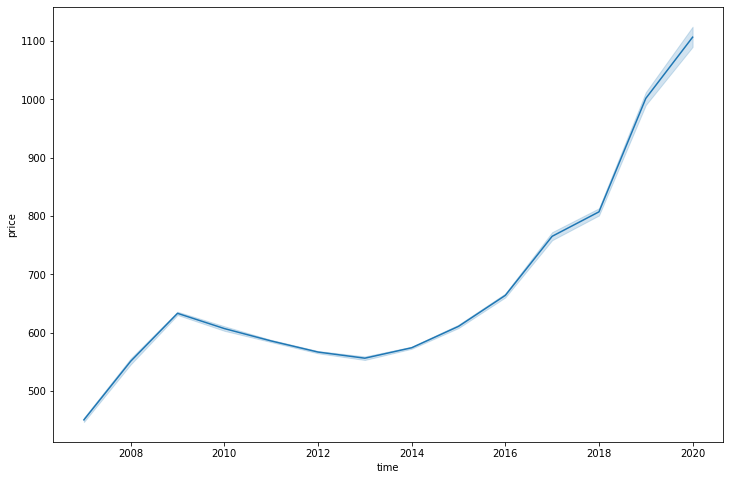

In [54]:

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
sns.lineplot(y=df['실거래가(평균)'], x=df['날짜'])
# sns.lineplot 그래프를 어떤 형식으로 할 건지 정하는 거라서 이걸 수정하는 편이 그래프 고치는 것 보다 쉽다.
plt.xlabel('time')

plt.ylabel('price')


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        3525 non-null   float64
 1   실거래가(평균)  3525 non-null   float64
 2   나스닥       3525 non-null   float64
 3   다우존스      3525 non-null   float64
 4   코스피       3525 non-null   float64
 5   지가변동률     3525 non-null   float64
 6   동행지수      3525 non-null   float64
 7   소비자물가지수   3525 non-null   float64
 8   생산자물가     3525 non-null   float64
 9   거래량       3525 non-null   float64
dtypes: float64(10)
memory usage: 275.5 KB


In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['날짜', '실거래가(평균)', '나스닥', '다우존스', '코스피', '지가변동률', '동행지수', '소비자물가지수', '생산자물가', '거래량']
# 스케일 후 columns
scaled = scaler.fit_transform(df[scale_cols])
scaled

array([[0.        , 0.        , 0.0992709 , ..., 0.        , 0.        ,
        0.24481328],
       [0.        , 0.        , 0.10186746, ..., 0.        , 0.        ,
        0.24481328],
       [0.        , 0.        , 0.10022526, ..., 0.        , 0.        ,
        0.24481328],
       ...,
       [1.        , 1.        , 0.99576985, ..., 0.98272121, 0.81083606,
        0.4253112 ],
       [1.        , 1.        , 0.99747223, ..., 0.98272121, 0.81083606,
        0.4253112 ],
       [1.        , 1.        , 0.99904564, ..., 0.98272121, 0.81083606,
        0.4253112 ]])

In [77]:
df2 = pd.DataFrame(scaled, columns = scale_cols) #x_train_data

In [78]:
x_train = df2[ :2500].drop('실거래가(평균)', 1)

In [79]:
x_test = df2[2500: ].drop('실거래가(평균)', 1) # 확인용도 얼마나 정확한지

In [80]:
y_train = df2.loc[ :2500,['실거래가(평균)']] # loc는 drop 한 함수와 다르게 134 까지 포함 시킨다.

In [81]:
y_test = df2.loc[2500 : , ['실거래가(평균)']]

In [82]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 2500 to 3524
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   실거래가(평균)  1025 non-null   float64
dtypes: float64(1)
memory usage: 8.1 KB


In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(df.drop('실거래가', axis = 1), df['실거래가'], test_size=0.1, random_state=5,shuffle=False)

In [ ]:
# x_train.shape, y_train.shape

# 위에 나온 값을 토대로 확인 앞에 값이 제대로 나오는지 확인 ex)151 맞는지 x 값 9개 맞는지

In [75]:
x_train

,날짜,나스닥,다우존스,코스피,지가변동률,동행지수,소비자물가지수,생산자물가,거래량
0,0.0,0.099271,0.246368,0.219329,0.939024,0.100418,0.000000,0.00000,0.244813
1,0.0,0.101867,0.246624,0.219329,0.939024,0.100418,0.000000,0.00000,0.244813
2,0.0,0.100225,0.243188,0.225144,0.939024,0.100418,0.000000,0.00000,0.244813
3,0.0,0.100561,0.244247,0.256631,0.939024,0.100418,0.000000,0.00000,0.244813
4,0.0,0.101042,0.243960,0.256631,0.939024,0.100418,0.000000,0.00000,0.244813
...,...,...,...,...,...,...,...,...,...
130,0.0,0.118926,0.292227,0.447998,0.912758,0.200837,0.062204,0.08454,0.307054
131,0.0,0.123216,0.304025,0.465008,0.912758,0.200837,0.062204,0.08454,0.307054
132,0.0,0.123672,0.305917,0.469856,0.912758,0.200837,0.062204,0.08454,0.307054
133,0.0,0.122838,0.307735,0.476689,0.912758,0.200837,0.062204,0.08454,0.307054


In [76]:
y_test

,실거래가(평균)
134,0.058669
135,0.058669
136,0.058669
137,0.058669
138,0.058669
...,...
3520,1.000000
3521,1.000000
3522,1.000000
3523,1.000000


In [83]:
import tensorflow as tf
WINDOW_SIZE=30 # 얼마동안의 기간을 학습해서 예측할 것인지
BATCH_SIZE=32


In [70]:
def windowed_dataset(x, y, window_size, batch_size, shuffle):

# X값 window dataset 구성
    ds_x = tf.data.Dataset.from_tensor_slices(x)
    ds_x = ds_x.window(window_size, shift=1, stride=1, drop_remainder=True)
    ds_x = ds_x.flat_map(lambda x: x.batch(window_size))

# y값 추가
    ds_y = tf.data.Dataset.from_tensor_slices(y[window_size:])
    ds = tf.data.Dataset.zip((ds_x, ds_y))
    if shuffle:
        ds = ds.shuffle(1000)
    return ds.batch(batch_size).prefetch(1)

In [84]:
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, False)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [112]:
model = keras.Sequential([
# 1차원 feature map 생성
    keras.layers.Conv1D(filters=64, kernel_size=9, # x 변수값 만큼 size한다
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 9]),
# LSTM
    keras.layers.LSTM(128, activation='tanh'),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()사용
loss = keras.losses.Huber()
optimizer = keras.optimizers.Adam(0.0005)
model.compile(loss=loss, optimizer=optimizer, metrics=['mse'])

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [113]:
# earlystopping은 35번 epoch통안 val_loss 개선이 없다면 학습 멈춤
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=35)

history = model.fit(train_data,
                    validation_data=(test_data),
                    epochs=100,
                    callbacks=[earlystopping])

Epoch 1/100
78/78 [==============================] - 8s 60ms/step - loss: 0.0014 - mse: 0.0028 - val_loss: 0.0422 - val_mse: 0.0844
Epoch 2/100
78/78 [==============================] - 4s 52ms/step - loss: 0.0012 - mse: 0.0023 - val_loss: 0.0507 - val_mse: 0.1014
Epoch 3/100
78/78 [==============================] - 4s 51ms/step - loss: 8.8456e-04 - mse: 0.0018 - val_loss: 0.0375 - val_mse: 0.0749
Epoch 4/100
78/78 [==============================] - 4s 51ms/step - loss: 8.4213e-04 - mse: 0.0017 - val_loss: 0.0351 - val_mse: 0.0702
Epoch 5/100
78/78 [==============================] - 4s 52ms/step - loss: 0.0010 - mse: 0.0021 - val_loss: 0.0340 - val_mse: 0.0680
Epoch 6/100
78/78 [==============================] - 4s 51ms/step - loss: 0.0011 - mse: 0.0022 - val_loss: 0.0393 - val_mse: 0.0785
Epoch 7/100
78/78 [==============================] - 4s 51ms/step - loss: 5.9164e-04 - mse: 0.0012 - val_loss: 0.0374 - val_mse: 0.0748
Epoch 8/100
78/78 [==============================] - 4s 51ms/ste

In [114]:
pred = model.predict(test_data)

In [115]:
pred.shape

(995, 1)

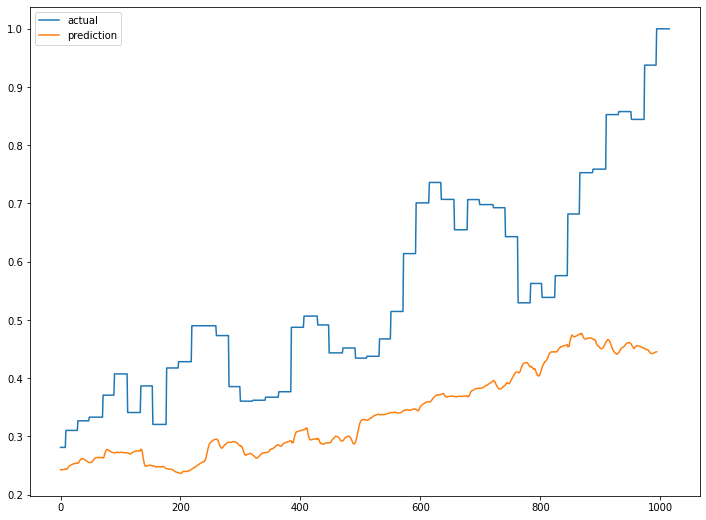

In [116]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[9:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


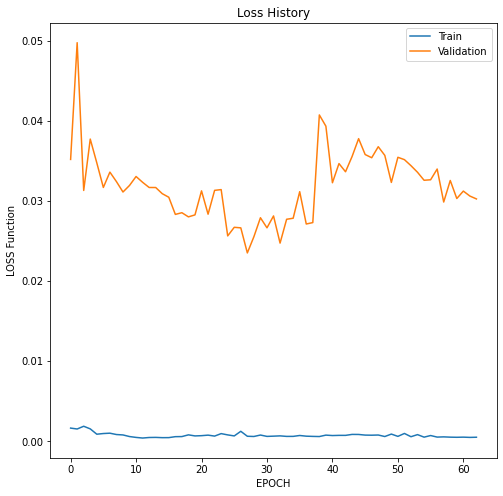

In [109]:
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, label = 'Train')
plt.plot(validation_history,label = 'Validation' )
plt.legend()

In [ ]:
trainPredict_dataset_like = np.zeros(shape=(len(pred), 10))
trainPredict_dataset_like[:,0] = pred[:, 0]
real_pred = scaler.inverse_transform(trainPredict_dataset_like)[:,0]
real_pred
